In [1]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

In [2]:
Kb = 1.0
JJ = 1.0
mu = 1.0

In [32]:
def cold_start(L):
    U = [1.0 for k in range(L)]
    return U

In [33]:
CU = cold_start(10)
CU

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [34]:
def hot_start(L): 
    U = [0.0 for i in range(L)]
    for i in range(L):
        t = random.sample([-1,1],1)
        U[i] = t[0]  
    return U

In [35]:
HU=hot_start(10)
HU

[-1, 1, 1, -1, 1, -1, 1, -1, -1, -1]

In [36]:
def Hamiltonian(U,B):
    H = 0.0
    L = len(U)
    for i in range(L):
        ni=0
        if i==L-1: ni=-L
        H= H- 0.5*mu*B*(  U[i]+ U[i+1+ni] )-JJ*U[i]*U[i+1+ni]
    return H


In [37]:
def magnetization(U):
    return np.array(U).sum()/float(len(U))

In [38]:
magnetization(CU)

1.0

In [39]:
def spin_flipper(U,B):
    L = len(U)
    i = random.randint(0, L-1) 
    Hold=Hamiltonian(U,B)
    U[i] = -U[i]
    Hnew=Hamiltonian(U,B)
    dH=Hnew-Hold
 
    return U,dH,i

In [40]:
def Thermalization(U,T,nrun,B) :
    M = [0.0 for k in range(nrun)]
    irun = 0       
    
    HH = [0.0 for k in range(nrun)]
       
    while irun < nrun:
        V = U
        w = magnetization(U)
        h = Hamiltonian(U,B)
                    
        U,dH,p = spin_flipper(U,B)
                   
        if dH < 0:
            M[irun] = magnetization(U)
            HH[irun] = Hamiltonian(U,B)
        else:
            frac = math.exp(-dH/(Kb*T))
            b = random.uniform(0.0,1.0)
                            
            if  b < frac:
                M[irun] = magnetization(U)
                HH[irun] = Hamiltonian(U,B)
            else:
                U[p] = -U[p]
                M[irun] = w 
                HH[irun] = h
        irun = irun +1
    return M,U,HH

In [43]:
L = 10
nrun = 10000
Tn = 100
avm = []
stdh = []
KT = []
B=0
for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = hot_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))

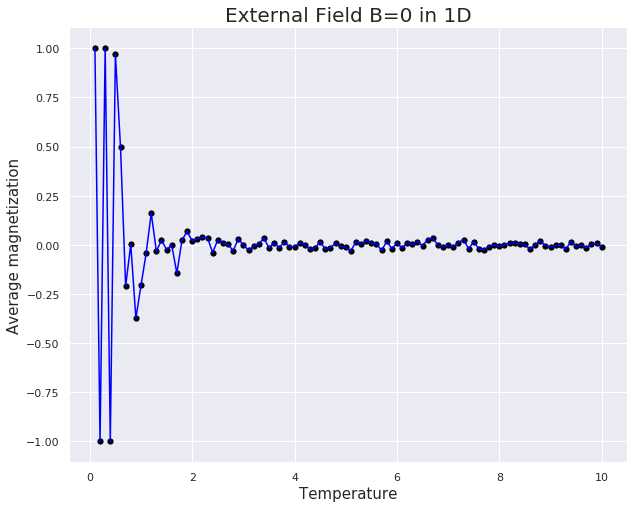

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = [10,8])
plt.title('External Field B=0 in 1D',fontsize=20 )
plt.scatter(KT,avm,color="black",s=27)
plt.plot(KT,avm,color="blue")
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Average magnetization",fontsize=15)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dB0phase.jpg')

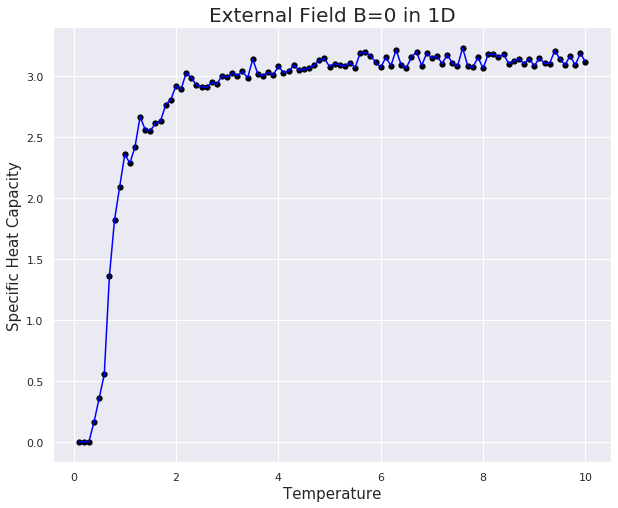

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize = [10,8])
plt.title('External Field B=0 in 1D',fontsize=20 )
plt.scatter(KT,stdh,color="black",s=27)
plt.plot(KT,stdh,color="blue")

plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Specific Heat Capacity",fontsize=15)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dB0Cv.jpg')

plt.show()

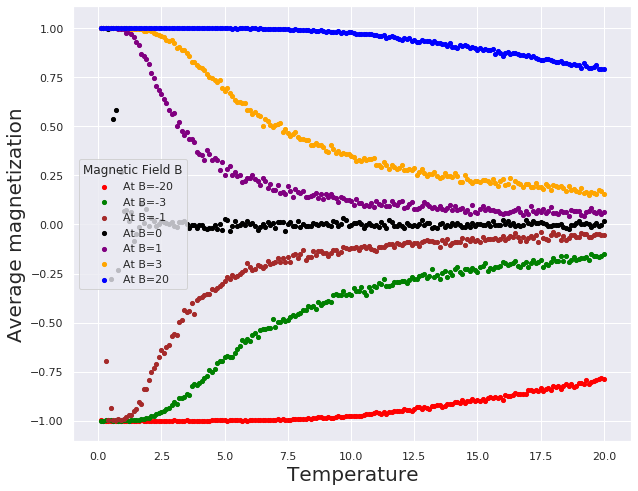

In [32]:
plt.figure(figsize = [10,8])
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-20,-3,-1,0,1,3,20]:
    colr=C[l]
    L = 4
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[0:nrun-1]
        nH = HH[0:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,avm,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Average magnetization",fontsize='20')
plt.legend(title=("Magnetic Field B"))
plt.show()

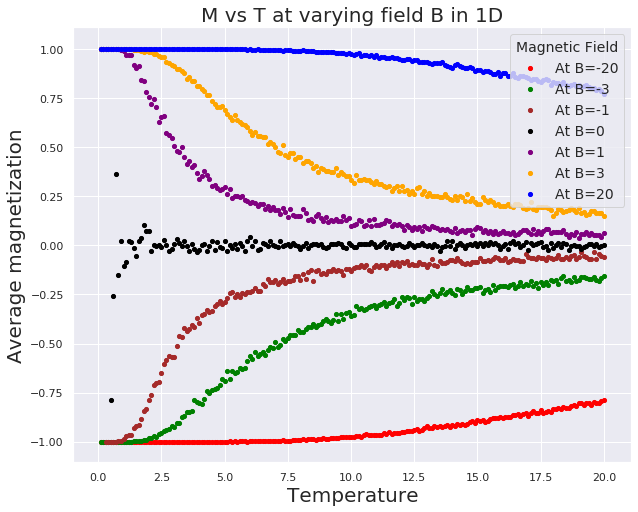

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize = [10,8])

plt.title('M vs T at varying field B in 1D',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-20,-3,-1,0,1,3,20]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,avm,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Average magnetization",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dphase.jpg')

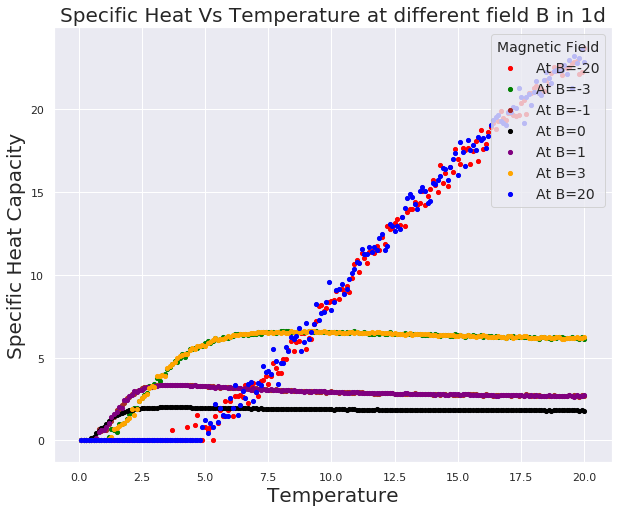

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-20,-3,-1,0,1,3,20]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dcv.jpg')

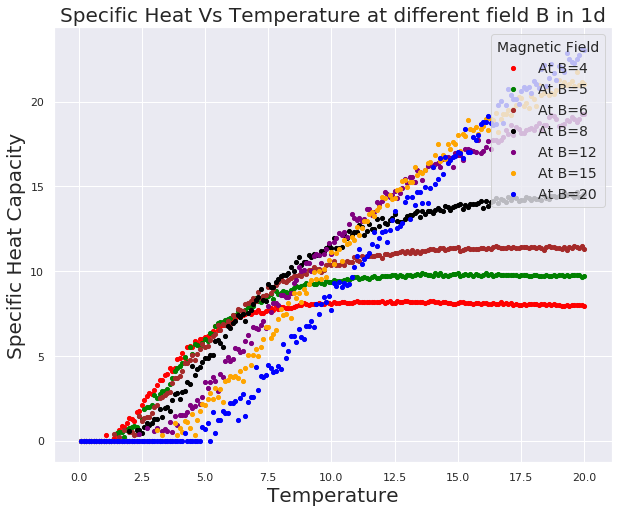

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [4,5,6,8,12,15,20]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dhighTcv.jpg')

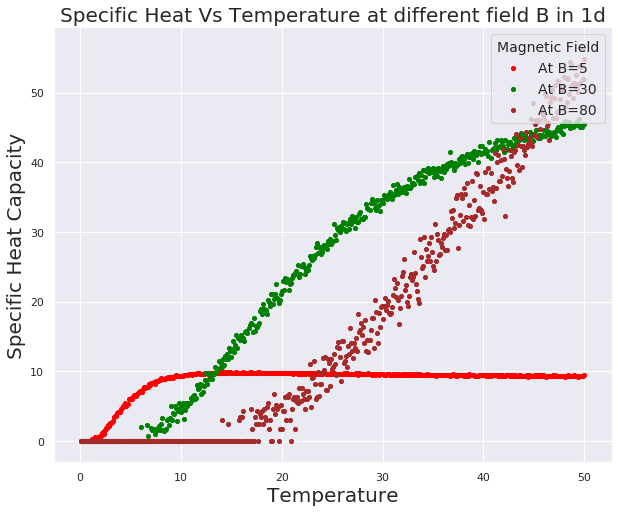

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [5,30,80]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 500
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dcv.jpg')

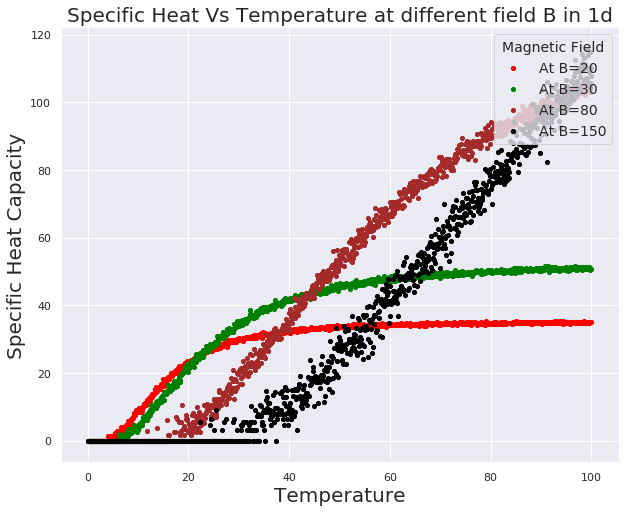

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [20,30,80,150]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 1000
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/1dcv.jpg')